# Intermediate Translation Language Basic Study

This is a simple example of what a study on the effect of intermediate translations on translation quality could look like.

In [86]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu, SmoothingFunction
from comet import download_model, load_from_checkpoint
import numpy as np
from tqdm import tqdm

Uploading the dataset:

In [87]:
df2008 = pd.read_csv("cwmt2008_ce_news.tsv", delimiter="\t")
df2008 = df2008.head(500)

Next we will upload the translations created through the translation.py file located in this project folder! It's noted more clearly there but the translations between the different languages were all completed through OpenAI's gpt-4o model.

Note that the order in the column names shows how the translation was completed (ChineseEnglish is simply Chinese to English, ChineseJapaneseEnglish is Chinese to Japanese to English, and so on)

In [88]:
translations2008 = pd.read_csv("translations2008.csv")

#This will add the translations we did to the main dataframe.
for col in translations2008.columns:
    df2008[col] = translations2008[col]

df2008.head(2)

,datasource,domain,setid,srclang,trglang,src,ref1,ref2,ref3,ChineseEnglish,ChineseJapaneseEnglish,ChineseGermanEnglish,ChineseTurkishEnglish,ChineseRussianEnglish,ChineseJapaneseGermanEnglish,ChineseGermanJapaneseEnglish
0,cwmt2008,ce-news,zh_en_news_trans,zh,en,狭小的防震棚已经成为北川擂鼓镇农民张秀华（58岁）临时的家，而就在这个“家”的中央，悬挂了一...,A small narrow anti-earthquake tent became the...,The shockproof shed has become a temporary hom...,The narrow quakeproof shelter has become the t...,The cramped earthquake-resistant shelter has b...,The small earthquake-resistant shelf has becom...,The small earthquake shelter has already becom...,The narrow earthquake-resistant shelter has be...,A narrow protective shelter has become a tempo...,The narrow earthquake protection shelf serves ...,The cramped earthquake-resistant accommodation...
1,cwmt2008,ce-news,zh_en_news_trans,zh,en,画像中，中共中央总书记胡锦涛和国务院总理温家宝两人在绵阳机场紧紧握手，画像下有一行题字：“伟...,"In this portrait, Hu Jintao, the General Secre...",The picture showed General Secretary of the Co...,"Hu Jintao, the general secretary of the CPC Ce...","In the image, General Secretary of the Communi...","In the image, Hu Jintao, General Secretary of ...","In the picture, the General Secretary of the C...","In the image, Chinese Communist Party General ...","In the image, Hu Jintao, General Secretary of ...","In the picture, the General Secretary of the C...","The photo shows Hu Jintao, the General Secreta..."


In [91]:
#finding colnames to use when calculating BLEU Scores
source_targets = [('Chinese', 'English'),('Chinese', 'Japanese', 'English'), ('Chinese', 'German', 'English'), ('Chinese', 'Turkish', 'English'), ('Chinese', 'Russian', 'English'), ('Chinese', 'Japanese', 'German', 'English'), ('Chinese', 'German', 'Japanese', 'English')]
colnames = []
for translation_course in source_targets:
    name = ""
    for lang in translation_course:
        name = name + lang
    colnames.append(name)

print("All Translation Paths Translated in this data set: \n")
    
for name in colnames:
    print(name)

All Translation Paths Translated in this data set: 

ChineseEnglish
ChineseJapaneseEnglish
ChineseGermanEnglish
ChineseTurkishEnglish
ChineseRussianEnglish
ChineseJapaneseGermanEnglish
ChineseGermanJapaneseEnglish


# Example Translations

Here is an example of 1 of the 500 translations in this dataset so we can examine what the differences may be.

In [90]:
print(f"Original Text {df2008.iloc[94]['src']}\n")

print(f"Reference Translations: \nref1: {df2008.iloc[94]['ref1']}\nref2: {df2008.iloc[94]['ref2']}\nref3: {df2008.iloc[94]['ref3']}\n")

for name in colnames:
    print(f"{name}: \n{df2008.iloc[94][name]}\n")


Original Text 爱心使城市充满了家的温暖

Reference Translations: 
ref1: Love filled the city with the warmth of a home.
ref2: Loving heart makes the city be filled with family's kindness.
ref3: Love makes the city full of warmth of home

ChineseEnglish: 
Love fills the city with the warmth of home.

ChineseJapaneseEnglish: 
Love gives warmth to a home in the city.

ChineseGermanEnglish: 
Love fills the city with the warmth of a home.

ChineseTurkishEnglish: 
Love fills the city with the warmth of home.

ChineseRussianEnglish: 
Love fills the city with the warmth of home comfort.

ChineseJapaneseGermanEnglish: 
Love fills the warmth of a home in the city.

ChineseGermanJapaneseEnglish: 
Love fills the city with the warmth of home.



Why do these different translation paths lead to these different results? I don't think I'm well taught enough in linguistics to know but interesting to consider.

# Calculating BLEU Scores

BLEU score, or Bilingual Evaluation Understudy score, is a commonly used measurement of translation quality.

In [30]:
#creating a references array for the 2008 dataset in a format acceptable to corpus_bleu
bleu_scores2008 = []

df2008[['ref1', 'ref2', 'ref3']] = df2008[['ref1', 'ref2', 'ref3']].astype(str)
references2008 = df2008[['ref1', 'ref2', 'ref3']].values.tolist()
references2008 = [[sentence.split() for sentence in ref_group] for ref_group in references2008]

for name in colnames:
    df2008[name] = df2008[name].astype(str)
    candidates2008 = df2008[name].values.tolist()
    candidates2008 = [sentence.split() for sentence in candidates2008]
    
    bleu_score = corpus_bleu(references2008, candidates2008)
    
    bleu_scores2008.append((name, bleu_score))

# BLEU Visualization

Note that a higher score means a higher quality translation.

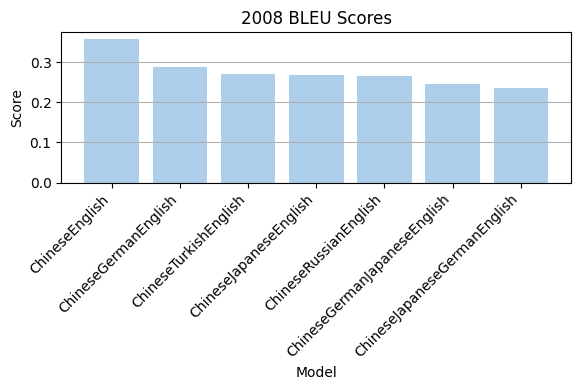

BLEU Scores: 

ChineseEnglish BLEU score (2008 Dataset): 0.35625709379251674
ChineseJapaneseEnglish BLEU score (2008 Dataset): 0.2670668198216971
ChineseGermanEnglish BLEU score (2008 Dataset): 0.288294022967804
ChineseTurkishEnglish BLEU score (2008 Dataset): 0.2705837630646435
ChineseRussianEnglish BLEU score (2008 Dataset): 0.2663629426854267
ChineseJapaneseGermanEnglish BLEU score (2008 Dataset): 0.23653280907459534
ChineseGermanJapaneseEnglish BLEU score (2008 Dataset): 0.24439025303823267


In [31]:
vis_df2008 = pd.DataFrame(bleu_scores2008, columns=['name', 'score'])
vis_df2008 = vis_df2008.sort_values(by='score', ascending=False)

plt.figure(figsize=(6, 4))
plt.bar(vis_df2008['name'], vis_df2008['score'], color='#ADCEEB')
plt.title('2008 BLEU Scores')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("BLEU Scores: \n")

for name, bleu_score in bleu_scores2008:
    print(f"{name} BLEU score (2008 Dataset): {bleu_score}")

# COMET Evaluation For the Practice

I'll also conduct an evaluation using the newer COMET, another translation metric, to confirm the translation rankings hold true.

In [9]:
comet_scores2008 = []


for name in colnames:    
    formatted_data2008 = []
    
    for _, row in df2008.iterrows():
        entry = {
            "src": row['src'],
            "mt": row[name],
            "ref": [row['ref1'],row['ref2'], row['ref3']]
        }
        formatted_data2008.append(entry)

    model_path = download_model("Unbabel/wmt22-comet-da")
    model = load_from_checkpoint(model_path)
    model_output = model.predict(formatted_data2008, batch_size=8, gpus=0)
    
    comet_score = sum(model_output.scores) / len(model_output.scores)
    
    comet_scores2008.append((name, comet_score))
    

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/ericbennett/miniforge3/lib/python3.10/site-packages/lightning_fabric/utilities/cloud_io.py:57: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
Lightning automatically upgraded your load

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/ericbennett/miniforge3/lib/python3.10/site-packages/lightning_fabric/utilities/cloud_io.py:57: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
Lightning automatically upgraded your load

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/ericbennett/miniforge3/lib/python3.10/site-packages/lightning_fabric/utilities/cloud_io.py:57: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
Lightning automatically upgraded your load

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/ericbennett/miniforge3/lib/python3.10/site-packages/lightning_fabric/utilities/cloud_io.py:57: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
Lightning automatically upgraded your load

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/ericbennett/miniforge3/lib/python3.10/site-packages/lightning_fabric/utilities/cloud_io.py:57: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
Lightning automatically upgraded your load

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/ericbennett/miniforge3/lib/python3.10/site-packages/lightning_fabric/utilities/cloud_io.py:57: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
Lightning automatically upgraded your load

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/ericbennett/miniforge3/lib/python3.10/site-packages/lightning_fabric/utilities/cloud_io.py:57: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
Lightning automatically upgraded your load

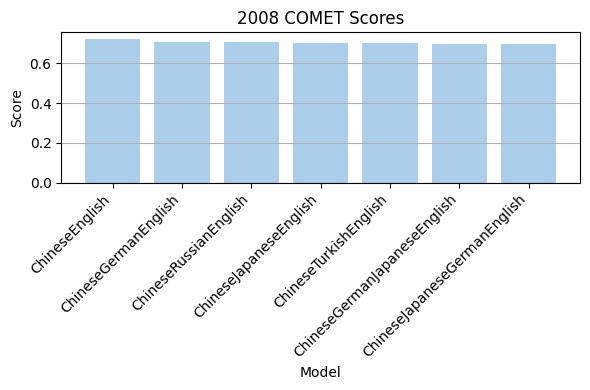

2008 COMET Scores:

ChineseEnglish: 0.7202454950809479
ChineseGermanEnglish: 0.7058889400959015
ChineseRussianEnglish: 0.7051904627680778
ChineseJapaneseEnglish: 0.7045392127037048
ChineseTurkishEnglish: 0.7030085378289223
ChineseGermanJapaneseEnglish: 0.699595034122467
ChineseJapaneseGermanEnglish: 0.6958579642176628


In [13]:
vis_df2008 = pd.DataFrame(comet_scores2008, columns=['name', 'score'])
vis_df2008 = vis_df2008.sort_values(by='score', ascending=False)

plt.figure(figsize=(6, 4))
plt.bar(vis_df2008['name'], vis_df2008['score'], color='#ADCEEB')
plt.title('2008 COMET Scores')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#print scores
print("2008 COMET Scores:\n")

for index, row in vis_df2008.iterrows():
    print(f"{row['name']}: {row['score']}")


As you can see while not as pronounced the direct translation from Chinese to English evaluated with COMET yields the same results as BLEU (though it is interesting to note that Chinese->Russian->English and Chinese->Turkish->English switch positions between the two evaluation tools)

# Conclusion

So, what have we learned? On the surface, this is very bleak. It seems there is pretty conclusive evidence to support the idea that using "more" translations not only DOESN'T HELP, but in fact HURTS translation quality.

Why is this sort of interlingual translation used at all in Machine Translation then? Here's some basic research:

- Using intermediary languages can allow for much wider application through a much smaller corpora. For example, if you have access to a Spanish to English corpus and an English to Chinese corpus you can use English as an intermediary to stretch to languages without easy access to data on translations.

- Resource availability and language could contribute to better performance using an intermediate language. For example, English to Ukrainian through Russian could provide better results than purely English to Ukranian because of abundant English to Russian data, and slightly less abundant English to Ukranian Data, and the closeness of 

- English was often used as an intermediary earlier on in this research, looks like that was more based on availability and may have damaged machine translation research!

- LLMs may access other languages with their translations, but to look further at that would have to compare something along the lines of an LLM with just Chinese and English data and one with Chinese and English and Japanese data to see if access to more languages yields better results.

# Going Further

A number of other questions came to mind when discussing this work, and what might alter the BLEU scores, which I will begin to explore now.

# Does the Length of the Source Text Impact BLEU Scores?

This comes from the hypothesis that some interlingual translation routes might lead to better outcomes than others depending on their length (for example, maybe ChineseJapeneseEnglish is very good at translating long sentences because of Japanese's grasp on detail making it perform better on longer sentences and worse on shorter ones.

## Simple Test

In [82]:
df_overten = df2008[df2008['src'].str.len() >= 10].copy()
print(f"Number of Rows after Filtering: {df_overten.shape[0]}")
print(f"Number of Rows removed: {df2008.shape[0] - df_overten.shape[0]}")

Number of Rows after Filtering: 486
Number of Rows removed: 14


As you can see, 14 of the rows have been removed for having sentence length < 10.

We'll calculate the BLEU Scores before going any further:

In [33]:
#creating a references array for the 2008 dataset in a format acceptable to corpus_bleu
bleu_scores_overten = []

df_overten[['ref1', 'ref2', 'ref3']] = df_overten[['ref1', 'ref2', 'ref3']].astype(str)
references_overten = df_overten[['ref1', 'ref2', 'ref3']].values.tolist()
references_overten = [[sentence.split() for sentence in ref_group] for ref_group in references_overten]

for name in colnames:
    df_overten[name] = df_overten[name].astype(str)
    candidates_overten = df_overten[name].values.tolist()
    candidates_overten = [sentence.split() for sentence in candidates_overten]
    
    bleu_score = corpus_bleu(references_overten, candidates_overten)
    
    bleu_scores_overten.append((name, bleu_score))

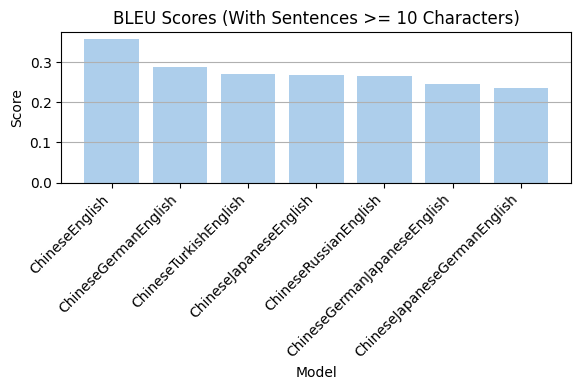

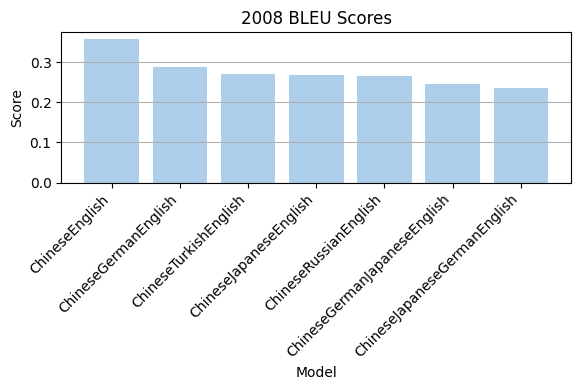

BLEU Scores (With Sentences >= 10 Characters): 

ChineseEnglish BLEU score (2008 Dataset): 0.3562800993656301
ChineseJapaneseEnglish BLEU score (2008 Dataset): 0.26723223575297067
ChineseGermanEnglish BLEU score (2008 Dataset): 0.28828409828414236
ChineseTurkishEnglish BLEU score (2008 Dataset): 0.2708621816955008
ChineseRussianEnglish BLEU score (2008 Dataset): 0.2664976529648128
ChineseJapaneseGermanEnglish BLEU score (2008 Dataset): 0.23643356597149023
ChineseGermanJapaneseEnglish BLEU score (2008 Dataset): 0.24451220032388318

BLEU Scores (With Sentences of all sizes): 

ChineseEnglish BLEU score (2008 Dataset): 0.35625709379251674
ChineseJapaneseEnglish BLEU score (2008 Dataset): 0.2670668198216971
ChineseGermanEnglish BLEU score (2008 Dataset): 0.288294022967804
ChineseTurkishEnglish BLEU score (2008 Dataset): 0.2705837630646435
ChineseRussianEnglish BLEU score (2008 Dataset): 0.2663629426854267
ChineseJapaneseGermanEnglish BLEU score (2008 Dataset): 0.23653280907459534
ChineseGe

In [83]:
#Visualization of BLEU Scores with only sentences over ten

vis_df_overten = pd.DataFrame(bleu_scores_overten, columns=['name', 'score'])
vis_df_overten = vis_df_overten.sort_values(by='score', ascending=False)

plt.figure(figsize=(6, 4))
plt.bar(vis_df_overten['name'], vis_df_overten['score'], color='#ADCEEB')
plt.title('BLEU Scores (With Sentences >= 10 Characters)')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#Visualization of BLEU
vis_df2008 = pd.DataFrame(bleu_scores2008, columns=['name', 'score'])
vis_df2008 = vis_df2008.sort_values(by='score', ascending=False)

plt.figure(figsize=(6, 4))
plt.bar(vis_df2008['name'], vis_df2008['score'], color='#ADCEEB')
plt.title('2008 BLEU Scores')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



print("BLEU Scores (With Sentences >= 10 Characters): \n")

for name, bleu_score in bleu_scores_overten:
    print(f"{name} BLEU score (2008 Dataset): {bleu_score}")
    
    
    
    
print("\nBLEU Scores (With Sentences of all sizes): \n")

for name, bleu_score in bleu_scores2008:
    print(f"{name} BLEU score (2008 Dataset): {bleu_score}")

As you can see removing the shorter sentences has not made any noticeable difference to the results! To triple check this I'll be creating a graph to show the change of BLEU score over length of sentences.

## Generalized Results

To make sure we are only making calculations with relevant amounts, we can calculate the smallest and largest length sentences.

In [65]:
# Creating a Dataframe
max_length = df2008['src'].str.len().max()
min_length = df2008['src'].str.len().min()

print(f"Longest Sentence: {max_length}")
print(f"Shortest Sentence: {min_length}")

Longest Sentence: 183
Shortest Sentence: 4


In [84]:
bleu_scores_dict = []

#calculate BLEU scores for every amount of length of source
for i in tqdm(range(min_length, 60)): 
    #Using the number 60 because there are only 100 sentences over the length 60, and going farther would make the 
    #BLEU scores possible messing with the results because of limited data.
    df_edited = df2008[df2008['src'].str.len() >= i].copy()
    
    bleu_scores_edited = []

    df_edited[['ref1', 'ref2', 'ref3']] = df_edited[['ref1', 'ref2', 'ref3']].astype(str)
    references_edited = df_edited[['ref1', 'ref2', 'ref3']].values.tolist()
    references_edited = [[sentence.split() for sentence in ref_group] for ref_group in references_edited]

    for name in colnames:
        df_edited[name] = df_edited[name].astype(str)
        candidates_edited = df_edited[name].values.tolist()
        candidates_edited = [sentence.split() for sentence in candidates_edited]

        bleu_score = corpus_bleu(references_edited, candidates_edited)

        bleu_scores_edited.append((name, bleu_score))
        
    bleu_scores_dict.append((i, bleu_scores_edited))
    
#convert it to a dataframe
bleu_scores_columns = {}

for length, scores in bleu_scores_dict:

    score_dict = dict(scores)
    bleu_scores_columns[length] = pd.Series(score_dict)

df_bleu_scores = pd.concat(bleu_scores_columns, axis=1)
df_bleu_scores.head()

100%|███████████████████████████████████████████| 56/56 [00:30<00:00,  1.82it/s]


,4,5,6,7,8,9,10,11,12,13,...,50,51,52,53,54,55,56,57,58,59
ChineseEnglish,0.356257,0.356279,0.356279,0.356123,0.356118,0.356149,0.356280,0.356280,0.356731,0.356800,...,0.350477,0.349314,0.351682,0.353696,0.355981,0.353602,0.354576,0.352545,0.354323,0.356742
ChineseJapaneseEnglish,0.267067,0.267082,0.267082,0.266994,0.267007,0.267044,0.267232,0.267232,0.267548,0.268143,...,0.268274,0.268692,0.270083,0.272403,0.273576,0.272674,0.274049,0.272823,0.275955,0.278295
ChineseGermanEnglish,0.288294,0.288304,0.288304,0.288216,0.288222,0.288244,0.288284,0.288284,0.288649,0.288745,...,0.284604,0.282153,0.283519,0.285578,0.286732,0.284871,0.286895,0.287466,0.290088,0.292378
ChineseTurkishEnglish,0.270584,0.270600,0.270600,0.270655,0.270693,0.270718,0.270862,0.270862,0.271163,0.271399,...,0.268629,0.269282,0.271980,0.273812,0.274069,0.274060,0.276028,0.278039,0.283494,0.285424
ChineseRussianEnglish,0.266363,0.266385,0.266385,0.266279,0.266291,0.266328,0.266498,0.266498,0.266570,0.266860,...,0.269207,0.269330,0.270592,0.271713,0.271623,0.269934,0.271536,0.273367,0.277009,0.277234


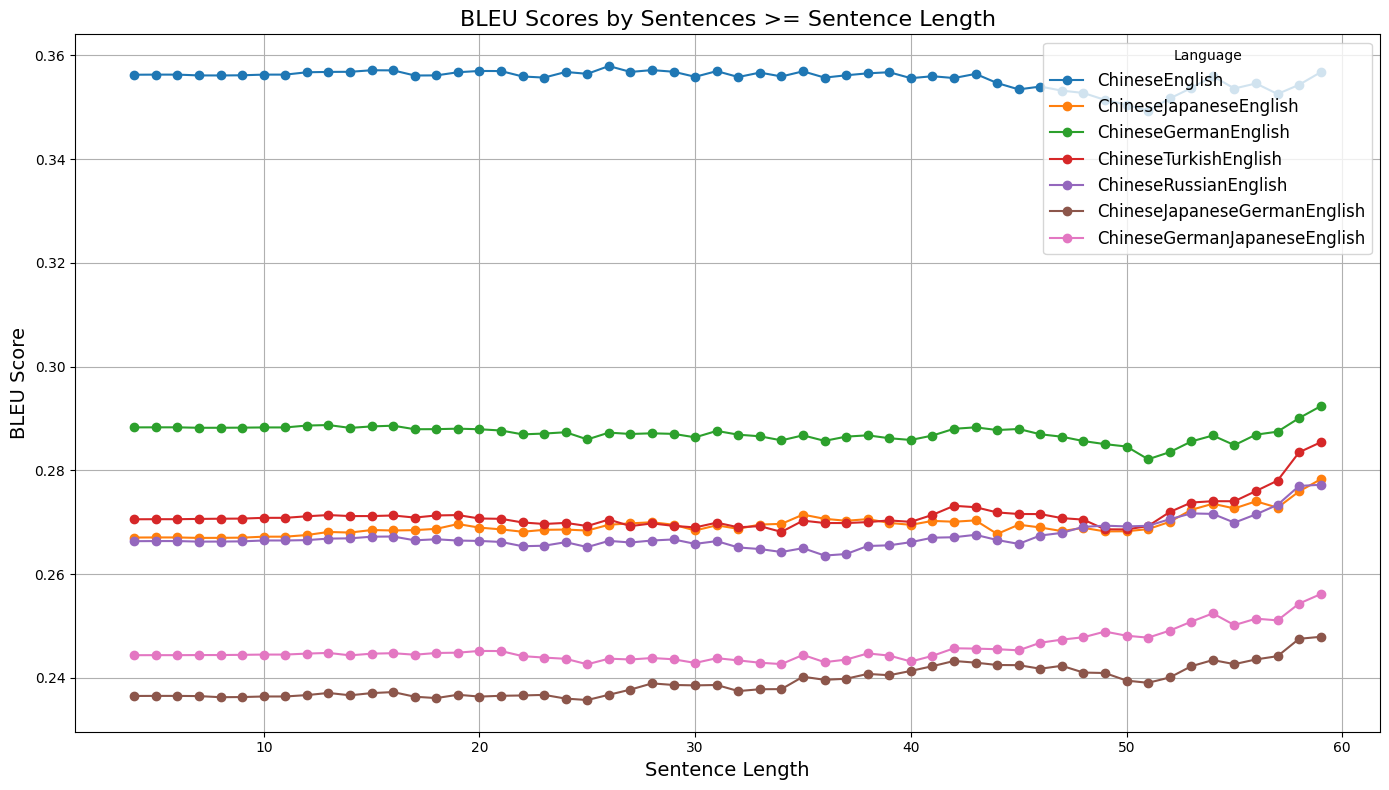

In [85]:
import matplotlib.pyplot as plt


df_bleu_scores_transposed = df_bleu_scores.T

plt.figure(figsize=(14, 8))
counter = 0
for language in df_bleu_scores_transposed.columns:
    plt.plot(df_bleu_scores_transposed.index, df_bleu_scores_transposed[language], marker='o', label=language)

plt.title("BLEU Scores by Sentences >= Sentence Length", fontsize=16)
plt.xlabel("Sentence Length", fontsize=14)
plt.ylabel("BLEU Score", fontsize=14)

plt.legend(title="Language", fontsize=12)

plt.grid()

plt.tight_layout()
plt.show()


## Conclusion (again)

It seems that sentence length isn't making a big difference here, supporting the idea that BLEU is a pretty good score in evaluating translations!

And supporting the idea that at least with gpt-4o, using intermediate languages damages translation quality.